# Analysis for China wage vs. education data

#### Since R cannot be ran on normal VS code, I had to install visual studio code insider for it!

## Datasets used

From Dropbox: China-Education-Wages -> Data -> CFPS Data 2010-2016

Downloaded:
- 2010 Egnlish -> ecfps2010adult_112014.dta     
  - Renamed 2010adult.dta
- 2012 Egnlish -> ecfps2012adultcombine…015.dta     
  - Renamed 2012adult.dta
- 2014 English -> ecfps2014adult_170630.dta     
  - Renamed 2014adult.dta
- Mincer16 -> Mincer16.csv 

All 4 datasets were put within one folder named $CFPSdata$ in the same layer as this jupyter notebook.

In [51]:
library(knitr)
library(xtable)
library(broom)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(stargazer)
library(lubridate)
library(haven)
library(ineq)
library(PerformanceAnalytics)
library(gglorenz)

## Manipulating data

### Read Data

In [52]:
mincer10 <- read_dta("./CFPSdata/mincer10.dta")
mincer12 <- read_dta("./CFPSdata/mincer12.dta")
mincer14 <- read_dta("./CFPSdata/mincer14.dta")
mincer16 <- read_dta("./CFPSdata/mincer16.dta")

### Adding education and year dummies to the data, then combining them into one dataframe

In [53]:
pinc <- function(df) {
    categorize <- 
        df %>%
        group_by(rinc) %>%
        tally()
    categorize = categorize[order(categorize$rinc), ]
    key <- categorize$rinc
    pinc <- c()
    sum_so_far <- 0
    total <- nrow(df)
    categorize$pinc <- 0
    for (row in seq_len(nrow(categorize))) {
      sum_so_far <- sum_so_far + categorize[row, "n"]
      categorize[row, "pinc"] <- (sum_so_far -
       (0.5 * categorize[row, "n"])) / total
    }
    ordered_combined <- df[order(df$rinc), ]
    ordered_combined$pinc <- 0
    current_rinc <- 0
    current_pinc <- 0
    current_row <- 0
    for (row in seq_len(nrow(ordered_combined))) {
      rinc <- ordered_combined[row, "rinc"]
      if (rinc != current_rinc) {
        current_row <- current_row + 1
        current_rinc <- rinc
        current_pinc <- categorize[current_row, "pinc"]
      }
      ordered_combined[row, "pinc"] <- current_pinc
    }
    ordered_combined$lnpinc <- log(ordered_combined$pinc)
    return(ordered_combined)
}

In [54]:
mincer10_urban <- filter(mincer10, urban == 1)
mincer10_rural <- filter(mincer10, urban == 0)
mincer10_female_urban <- filter(mincer10_urban, gender == 1)
mincer10_female_rural <- filter(mincer10_rural, gender == 1)
mincer10_male_urban <- filter(mincer10_urban, gender == 0)
mincer10_male_rural <- filter(mincer10_rural, gender == 0)

mincer10$rinc <- mincer10$income / mean(mincer10$income)

mincer10_urban$rinc <- mincer10_urban$income / mean(mincer10_urban$income)
mincer10_rural$rinc <- mincer10_rural$income / mean(mincer10_rural$income)
mincer10_female_urban$rinc <- mincer10_female_urban$income /
 mean(mincer10_female_urban$income)
mincer10_female_rural$rinc <- mincer10_female_rural$income /
 mean(mincer10_female_rural$income)
mincer10_male_urban$rinc <- mincer10_male_urban$income /
 mean(mincer10_male_urban$income)
mincer10_male_rural$rinc <- mincer10_male_rural$income /
 mean(mincer10_male_rural$income)

In [55]:
mincer10 <- pinc(mincer10)

mincer10_urban <- pinc(mincer10_urban)

mincer10_rural <- pinc(mincer10_rural)

mincer10_female_urban <- pinc(mincer10_female_urban)

mincer10_female_rural <- pinc(mincer10_female_rural)

mincer10_male_urban <- pinc(mincer10_male_urban)

mincer10_male_rural <- pinc(mincer10_male_rural)

In [57]:
mincer12_urban <- filter(mincer12, urban == 1)
mincer12_rural <- filter(mincer12, urban == 0)
mincer12_female_urban <- filter(mincer12_urban, gender == 1)
mincer12_female_rural <- filter(mincer12_rural, gender == 1)
mincer12_male_urban <- filter(mincer12_urban, gender == 0)
mincer12_male_rural <- filter(mincer12_rural, gender == 0)

mincer12$rinc <- mincer12$income / mean(mincer12$income)

mincer12_urban$rinc <- mincer12_urban$income / mean(mincer12_urban$income)
mincer12_rural$rinc <- mincer12_rural$income / mean(mincer12_rural$income)
mincer12_female_urban$rinc <- mincer12_female_urban$income /
 mean(mincer12_female_urban$income)
mincer12_female_rural$rinc <- mincer12_female_rural$income /
 mean(mincer12_female_rural$income)
mincer12_male_urban$rinc <- mincer12_male_urban$income /
 mean(mincer12_male_urban$income)
mincer12_male_rural$rinc <- mincer12_male_rural$income /
 mean(mincer12_male_rural$income)

In [58]:
mincer12 <- pinc(mincer12)

mincer12_urban <- pinc(mincer12_urban)

mincer12_rural <- pinc(mincer12_rural)

mincer12_female_urban <- pinc(mincer12_female_urban)

mincer12_female_rural <- pinc(mincer12_female_rural)

mincer12_male_urban <- pinc(mincer12_male_urban)

mincer12_male_rural <- pinc(mincer12_male_rural)

In [62]:
mincer14_urban <- filter(mincer14, urban == 1)
mincer14_rural <- filter(mincer14, urban == 0)
mincer14_female_urban <- filter(mincer14_urban, gender == 1)
mincer14_female_rural <- filter(mincer14_rural, gender == 1)
mincer14_male_urban <- filter(mincer14_urban, gender == 0)
mincer14_male_rural <- filter(mincer14_rural, gender == 0)

mincer14$rinc <- mincer14$income / mean(mincer14$income)

mincer14_urban$rinc <- mincer14_urban$income / mean(mincer14_urban$income)
mincer14_rural$rinc <- mincer14_rural$income / mean(mincer14_rural$income)
mincer14_female_urban$rinc <- mincer14_female_urban$income /
 mean(mincer14_female_urban$income)
mincer14_female_rural$rinc <- mincer14_female_rural$income /
 mean(mincer14_female_rural$income)
mincer14_male_urban$rinc <- mincer14_male_urban$income /
 mean(mincer14_male_urban$income)
mincer14_male_rural$rinc <- mincer14_male_rural$income /
 mean(mincer14_male_rural$income)

In [63]:
mincer14 <- pinc(mincer14)

mincer14_urban <- pinc(mincer14_urban)

mincer14_rural <- pinc(mincer14_rural)

mincer14_female_urban <- pinc(mincer14_female_urban)

mincer14_female_rural <- pinc(mincer14_female_rural)

mincer14_male_urban <- pinc(mincer14_male_urban)

mincer14_male_rural <- pinc(mincer14_male_rural)

In [64]:
mincer16_urban <- filter(mincer16, urban == 1)
mincer16_rural <- filter(mincer16, urban == 0)
mincer16_female_urban <- filter(mincer16_urban, gender == 1)
mincer16_female_rural <- filter(mincer16_rural, gender == 1)
mincer16_male_urban <- filter(mincer16_urban, gender == 0)
mincer16_male_rural <- filter(mincer16_rural, gender == 0)

mincer16$rinc <- mincer16$income / mean(mincer16$income)

mincer16_urban$rinc <- mincer16_urban$income / mean(mincer16_urban$income)
mincer16_rural$rinc <- mincer16_rural$income / mean(mincer16_rural$income)
mincer16_female_urban$rinc <- mincer16_female_urban$income /
 mean(mincer16_female_urban$income)
mincer16_female_rural$rinc <- mincer16_female_rural$income /
 mean(mincer16_female_rural$income)
mincer16_male_urban$rinc <- mincer16_male_urban$income /
 mean(mincer16_male_urban$income)
mincer16_male_rural$rinc <- mincer16_male_rural$income /
 mean(mincer16_male_rural$income)

In [65]:
mincer16 <- pinc(mincer16)

mincer16_urban <- pinc(mincer16_urban)

mincer16_rural <- pinc(mincer16_rural)

mincer16_female_urban <- pinc(mincer16_female_urban)

mincer16_female_rural <- pinc(mincer16_female_rural)

mincer16_male_urban <- pinc(mincer16_male_urban)

mincer16_male_rural <- pinc(mincer16_male_rural)

In [69]:
combined <- full_join(mincer10, full_join(mincer12, full_join(mincer14, mincer16)))
combined$lninc <- log(combined$income)
combined$lnrinc <- log(combined$rinc)

urban <- full_join(mincer10_urban,
 full_join(mincer12_urban, full_join(mincer14_urban, mincer16_urban)))
urban$lninc <- log(urban$income)
urban$lnrinc <- log(urban$rinc)


rural <- full_join(mincer10_rural,
 full_join(mincer12_rural, full_join(mincer14_rural, mincer16_rural)))
rural$lninc <- log(rural$income)
rural$lnrinc <- log(rural$rinc)


female_urban <- full_join(mincer10_female_urban,
 full_join(mincer12_female_urban,
 full_join(mincer14_female_urban, mincer16_female_urban)))
female_urban$lninc <- log(female_urban$income)
female_urban$lnrinc <- log(female_urban$rinc)


female_rural <- full_join(mincer10_female_rural,
 full_join(mincer12_female_rural,
 full_join(mincer14_female_rural, mincer16_female_rural)))
female_rural$lninc <- log(female_rural$income)
female_rural$lnrinc <- log(female_rural$rinc)


male_urban <- full_join(mincer10_male_urban,
 full_join(mincer12_male_urban,
 full_join(mincer14_male_urban, mincer16_male_urban)))
male_urban$lninc <- log(male_urban$income)
male_urban$lnrinc <- log(male_urban$rinc)

male_rural <- full_join(mincer10_male_rural,
 full_join(mincer12_male_rural,
 full_join(mincer14_male_rural, mincer16_male_rural)))
male_rural$lninc <- log(male_rural$income)
male_rural$lnrinc <- log(male_rural$rinc)

Joining, by = c("pid", "income", "age", "gender", "urban", "prov", "ethnic", "married", "party", "postsecondary", "seniorsecondary", "juniorsecondary", "primary", "illiterate", "y10", "y12", "y14", "y16", "Shanghai", "Liaoning", "Guangdong", "Gansu", "Others", "edu", "rinc", "pinc", "lnpinc")

Joining, by = c("pid", "income", "age", "gender", "urban", "prov", "ethnic", "married", "party", "postsecondary", "seniorsecondary", "juniorsecondary", "primary", "illiterate", "y10", "y12", "y14", "y16", "Shanghai", "Liaoning", "Guangdong", "Gansu", "Others", "edu", "rinc", "pinc", "lnpinc")

Joining, by = c("pid", "income", "age", "gender", "urban", "prov", "ethnic", "married", "party", "edu", "postsecondary", "seniorsecondary", "juniorsecondary", "primary", "illiterate", "y10", "y12", "y14", "y16", "Shanghai", "Liaoning", "Guangdong", "Gansu", "Others", "rinc", "pinc", "lnpinc")

Warning message in .fn(vec_data(.x), ...):
"NaNs produced"
Warning message in log(combined$rinc):
"NaNs produced"
J

### Computing Lorenz curves for combined, male, and female for each year

Warning message:
"Unknown or uninitialised column: `year_str`."
Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.

Saving 7 x 7 in image

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



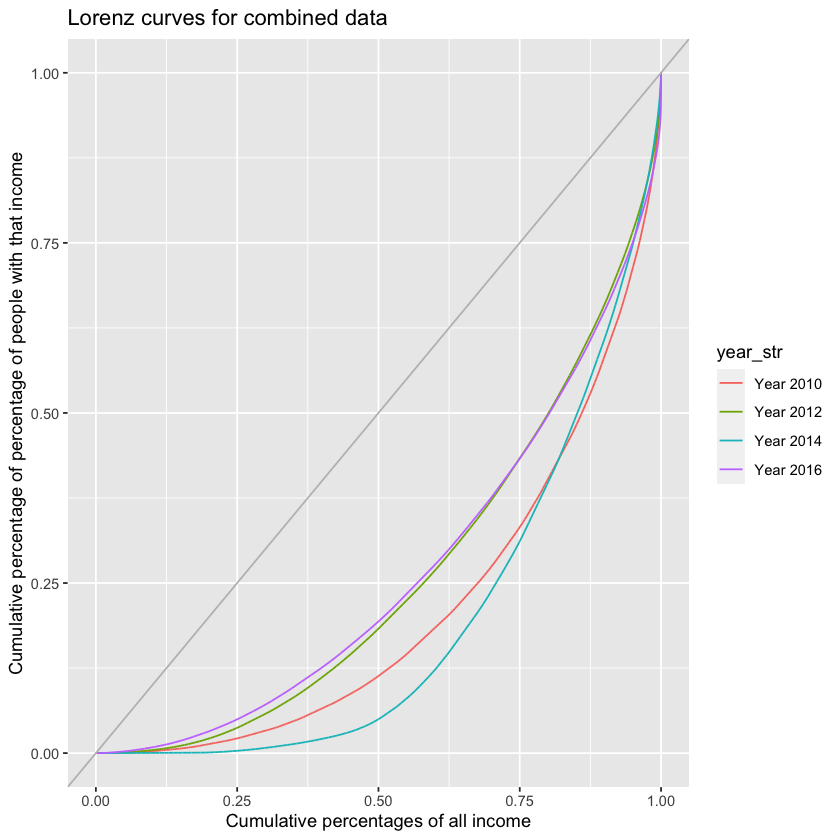

Saving 7 x 7 in image

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



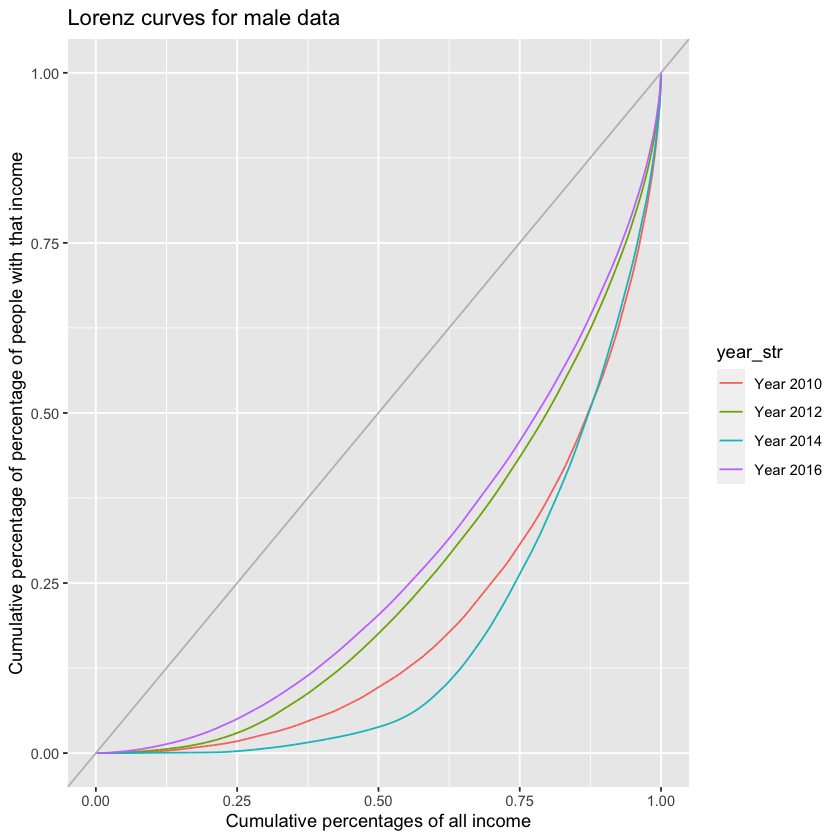

Saving 7 x 7 in image

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



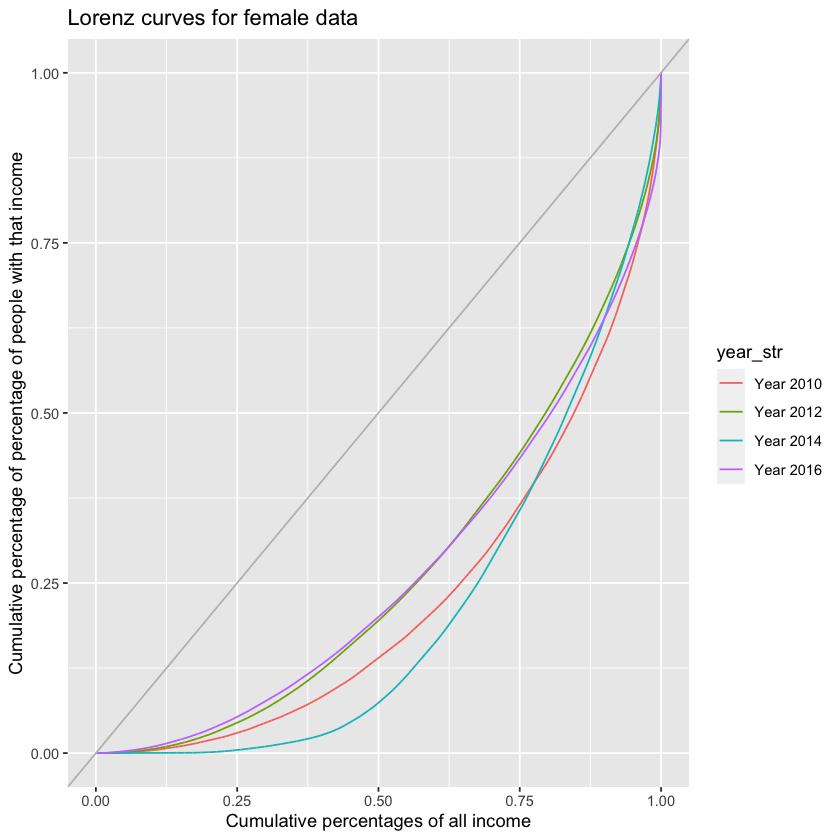

In [46]:
lorenz_combined <- filter(combined, income >= 0)

lorenz_combined$year_str[lorenz_combined$y10 == 1] <- "Year 2010"
lorenz_combined$year_str[lorenz_combined$y12 == 1] <- "Year 2012"
lorenz_combined$year_str[lorenz_combined$y14 == 1] <- "Year 2014"
lorenz_combined$year_str[lorenz_combined$y16 == 1] <- "Year 2016"

lorenz_male <- filter(lorenz_combined, gender == 0)
lorenz_female <- filter(lorenz_combined, gender == 1)

ggplot(lorenz_combined, aes(x = income, colour = year_str)) +
  stat_lorenz() +
  geom_abline(color = "grey") +
  labs(x = "Cumulative percentages of all income",
       y = "Cumulative percentage of percentage of people with that income",
       title = "Lorenz curves for combined data")

ggsave("LorenzCurves/Lorenz_curve_combined.png")

ggplot(lorenz_male, aes(x = income, colour = year_str)) +
  stat_lorenz() +
  geom_abline(color = "grey") +
  labs(x = "Cumulative percentages of all income",
       y = "Cumulative percentage of percentage of people with that income",
       title = "Lorenz curves for male data")

ggsave("LorenzCurves/Lorenz_curve_male.png")

ggplot(lorenz_female, aes(x = income, colour = year_str)) +
  stat_lorenz() +
  geom_abline(color = "grey") +
  labs(x = "Cumulative percentages of all income",
       y = "Cumulative percentage of percentage of people with that income",
       title = "Lorenz curves for female data")

ggsave("LorenzCurves/Lorenz_curve_female.png")

In [ ]:
sprintf("Combined: %f, %f, %f, %f", Gini(mincer10$inc), Gini(mincer12$inc),
 Gini(mincer14$inc), Gini(mincer16$inc))
sprintf("Urban: %f, %f, %f, %f", Gini(mincer10_urban$inc),
 Gini(mincer12_urban$inc), Gini(mincer14_urban$inc), Gini(mincer16_urban$inc))
sprintf("Rural: %f, %f, %f, %f", Gini(mincer10_rural$inc),
 Gini(mincer12_rural$inc), Gini(mincer14_rural$inc), Gini(mincer16_rural$inc))
sprintf("Female Urban: %f, %f, %f, %f",
 Gini(mincer10_female_urban$inc),Gini(mincer12_female_urban$inc),
  Gini(mincer14_female_urban$inc), Gini(mincer16_female_urban$inc))
sprintf("Female Rural: %f, %f, %f, %f",
 Gini(mincer10_female_rural$inc), Gini(mincer12_female_rural$inc),
  Gini(mincer14_female_rural$inc), Gini(mincer16_female_rural$inc))
sprintf("Male Urban: %f, %f, %f, %f",
 Gini(mincer10_male_urban$inc), Gini(mincer12_male_urban$inc),
  Gini(mincer14_male_urban$inc), Gini(mincer16_male_urban$inc))
sprintf("male Rural: %f, %f, %f, %f",
 Gini(mincer10_male_rural$inc), Gini(mincer12_male_rural$inc),
  Gini(mincer14_male_rural$inc), Gini(mincer16_male_rural$inc))

## Running the descriptive analysis for the all of the sub populations

### For combined data

In [ ]:
hist(combined$lninc)
hist(urban$lninc)
hist(rural$lninc)
hist(female_urban$lninc)
hist(female_rural$lninc)
hist(male_urban$lninc)
hist(male_rural$lninc)


In [ ]:
hist(combined$lnrinc)
hist(urban$lnrinc)
hist(rural$lnrinc)
hist(female_urban$lnrinc)
hist(female_rural$lnrinc)
hist(male_urban$lnrinc)
hist(male_rural$lnrinc)

In [ ]:
hist(combined$lnpinc)
hist(urban$lnpinc)
hist(rural$lnpinc)
hist(female_urban$lnpinc)
hist(female_rural$lnpinc)
hist(male_urban$lnpinc)
hist(male_rural$lnpinc)

## Running the regressions for lninc, rinc, lnrinc, pinc, and lnpinc on combined data, and urban and rural subsamples. Does not contain married or party variables

### Regression for lninc, without province dummies

In [97]:
lnincReg <- filter(combined, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary
 + primary + gender + urban + y10 + y12 + y14, data = lnincReg))

urban_reg <- filter(urban, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary
 + primary + gender + y10 + y12 + y14, data = urban_reg))

rural_reg <- filter(rural, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary
 + primary + gender + y10 + y12 + y14, data = rural_reg))

female_urban_reg <- filter(female_urban, !is.infinite(lninc) & !is.na(lninc))
female_rural_reg <- filter(female_rural, !is.infinite(lninc) & !is.na(lninc))
male_urban_reg <- filter(male_urban, !is.infinite(lninc) & !is.na(lninc))
male_rural_reg <- filter(male_rural, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14, data = female_urban_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14, data = female_rural_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14, data = male_urban_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14, data = male_rural_reg))


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14, data = lnincReg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6392  -0.6332   0.2250   0.9423   5.2326 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.443125   0.025481  331.35   <2e-16 ***
postsecondary    2.188063   0.023494   93.13   <2e-16 ***
seniorsecondary  1.633039   0.021605   75.58   <2e-16 ***
juniorsecondary  1.429606   0.018565   77.00   <2e-16 ***
primary          0.819746   0.020507   39.97   <2e-16 ***
gender           0.283859   0.009722   29.20   <2e-16 ***
urban            0.008056   0.004854    1.66    0.097 .  
y10             -0.969848   0.022817  -42.51   <2e-16 ***
y12             -0.396439   0.023851  -16.62   <2e-16 ***
y14             -1.495090   0.024711  -60.50   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.54


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.6077  -0.5569   0.2052   0.8037   4.4072 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.66084    0.03251 266.412  < 2e-16 ***
postsecondary    1.89252    0.02851  66.384  < 2e-16 ***
seniorsecondary  1.35514    0.02774  48.847  < 2e-16 ***
juniorsecondary  1.19745    0.02594  46.154  < 2e-16 ***
primary          0.69869    0.02991  23.363  < 2e-16 ***
gender           0.28341    0.01240  22.852  < 2e-16 ***
y10             -0.73303    0.02680 -27.351  < 2e-16 ***
y12             -0.22904    0.02794  -8.199 2.52e-16 ***
y14             -1.17103    0.02869 -40.820  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.357 on 30211 degrees of freedom
Multiple R-squared:  0.2352,	Adjusted R-squar


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9749 -0.7960  0.2391  1.0208  5.4499 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.52463    0.04046  210.72   <2e-16 ***
postsecondary    1.82150    0.05002   36.41   <2e-16 ***
seniorsecondary  1.45028    0.03670   39.52   <2e-16 ***
juniorsecondary  1.36288    0.02701   50.45   <2e-16 ***
primary          0.78624    0.02813   27.95   <2e-16 ***
gender           0.35158    0.01515   23.21   <2e-16 ***
y10             -1.26558    0.03803  -33.28   <2e-16 ***
y12             -0.61351    0.03985  -15.40   <2e-16 ***
y14             -2.15942    0.04230  -51.05   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.661 on 27260 degrees of freedom
Multiple R-squared:  0.2628,	Adjusted R-squared:  0.262


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = female_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5366  -0.4747   0.2038   0.7656   4.3894 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.17321    0.04408 208.093  < 2e-16 ***
postsecondary    1.63479    0.04022  40.649  < 2e-16 ***
seniorsecondary  1.11977    0.03930  28.490  < 2e-16 ***
juniorsecondary  1.05796    0.03705  28.553  < 2e-16 ***
primary          0.49623    0.04169  11.902  < 2e-16 ***
y10             -0.67754    0.03426 -19.776  < 2e-16 ***
y12             -0.27137    0.03567  -7.608 2.95e-14 ***
y14             -1.06809    0.03680 -29.024  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.287 on 16121 degrees of freedom
Multiple R-squared:  0.1812,	Adjusted R-squared:  0.1808 
F-statistic: 509.5 on 7 and 16121 DF,  p-value


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = female_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7751 -0.6959  0.2021  0.9375  5.4815 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.06400    0.05126  176.84   <2e-16 ***
postsecondary    1.60212    0.06468   24.77   <2e-16 ***
seniorsecondary  1.31330    0.04580   28.67   <2e-16 ***
juniorsecondary  1.23955    0.03540   35.02   <2e-16 ***
primary          0.63528    0.03723   17.06   <2e-16 ***
y10             -1.23074    0.04718  -26.08   <2e-16 ***
y12             -0.60218    0.04915  -12.25   <2e-16 ***
y14             -2.12121    0.05209  -40.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.595 on 16003 degrees of freedom
Multiple R-squared:  0.2258,	Adjusted R-squared:  0.2255 
F-statistic: 666.8 on 7 and 16003 DF,  p-value: < 2.2e-1


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = male_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5817  -0.5867   0.2239   0.8425   4.5661 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.51991    0.04729 180.162  < 2e-16 ***
postsecondary    2.06180    0.04071  50.642  < 2e-16 ***
seniorsecondary  1.49465    0.03950  37.843  < 2e-16 ***
juniorsecondary  1.20284    0.03672  32.761  < 2e-16 ***
primary          0.79486    0.04332  18.349  < 2e-16 ***
y10             -0.78463    0.04159 -18.864  < 2e-16 ***
y12             -0.21748    0.04345  -5.005 5.65e-07 ***
y14             -1.27540    0.04434 -28.761  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.412 on 14020 degrees of freedom
Multiple R-squared:  0.2576,	Adjusted R-squared:  0.2573 
F-statistic: 695.1 on 7 and 14020 DF,  p-value: 


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = male_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8573 -0.9489  0.2283  1.0882  5.0385 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.40390    0.06417  130.96   <2e-16 ***
postsecondary    2.01243    0.07857   25.61   <2e-16 ***
seniorsecondary  1.45335    0.06281   23.14   <2e-16 ***
juniorsecondary  1.33696    0.04322   30.93   <2e-16 ***
primary          0.83168    0.04386   18.96   <2e-16 ***
y10             -1.30337    0.06258  -20.83   <2e-16 ***
y12             -0.72703    0.06633  -10.96   <2e-16 ***
y14             -2.24163    0.07039  -31.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.726 on 11172 degrees of freedom
Multiple R-squared:  0.2494,	Adjusted R-squared:  0.2489 
F-statistic: 530.3 on 7 and 11172 DF,  p-value: < 2.2e-16


### Regression for lninc, with province dummies

In [98]:
lnincReg <- filter(combined, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + gender + y10 + y12 + y14 
 + Liaoning + Guangdong + Gansu + Others, data = lnincReg))

urban_reg <- filter(urban, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + gender + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = urban_reg))

rural_reg <- filter(rural, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + gender + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = rural_reg))

female_urban_reg <- filter(female_urban, !is.infinite(lninc) & !is.na(lninc))
female_rural_reg <- filter(female_rural, !is.infinite(lninc) & !is.na(lninc))
male_urban_reg <- filter(male_urban, !is.infinite(lninc) & !is.na(lninc))
male_rural_reg <- filter(male_rural, !is.infinite(lninc) & !is.na(lninc))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = female_urban_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = female_rural_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = male_urban_reg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = male_rural_reg))


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = lnincReg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5954  -0.6238   0.2159   0.9332   5.2774 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.246757   0.033788  273.67   <2e-16 ***
postsecondary    2.091541   0.023333   89.64   <2e-16 ***
seniorsecondary  1.561796   0.021395   73.00   <2e-16 ***
juniorsecondary  1.375620   0.018440   74.60   <2e-16 ***
primary          0.791708   0.020298   39.01   <2e-16 ***
gender           0.301423   0.009616   31.34   <2e-16 ***
y10             -1.044293   0.022913  -45.58   <2e-16 ***
y12             -0.466702   0.023949  -19.49   <2e-16 ***
y14             -1.582289   0.024721  -64.01   <2e-16 ***
Liaoning        -0.718072   0.029737  -24.15   <2e-16 ***
Guangdong       -0.531866   0.029571  -17.99   <2e-16 ***
Ga


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5264  -0.5302   0.1922   0.8052   4.5268 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.21885    0.03934 234.326   <2e-16 ***
postsecondary    1.85632    0.02831  65.575   <2e-16 ***
seniorsecondary  1.33038    0.02748  48.404   <2e-16 ***
juniorsecondary  1.18061    0.02573  45.891   <2e-16 ***
primary          0.69196    0.02960  23.377   <2e-16 ***
gender           0.30015    0.01229  24.431   <2e-16 ***
y10             -0.84887    0.02708 -31.350   <2e-16 ***
y12             -0.34035    0.02819 -12.073   <2e-16 ***
y14             -1.27724    0.02889 -44.204   <2e-16 ***
Liaoning        -0.46682    0.03189 -14.640   <2e-16 ***
Guangdong       -0.31119    0.03140  -9.912   <2e-16 ***
Gansu        


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9740 -0.7955  0.2422  1.0030  5.4741 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.59878    0.06754  142.12   <2e-16 ***
postsecondary    1.77885    0.04965   35.83   <2e-16 ***
seniorsecondary  1.43148    0.03641   39.32   <2e-16 ***
juniorsecondary  1.33326    0.02692   49.52   <2e-16 ***
primary          0.77180    0.02799   27.57   <2e-16 ***
gender           0.35217    0.01505   23.41   <2e-16 ***
y10             -1.27196    0.03823  -33.27   <2e-16 ***
y12             -0.61616    0.04010  -15.36   <2e-16 ***
y14             -2.19256    0.04247  -51.63   <2e-16 ***
Liaoning        -1.13437    0.06425  -17.65   <2e-16 ***
Guangdong       -0.96807    0.06469  -14.96   <2e-16 ***
Gansu           -1.2594


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4754  -0.4630   0.1973   0.7803   4.2512 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.65001    0.05333 180.949  < 2e-16 ***
postsecondary    1.59333    0.04006  39.776  < 2e-16 ***
seniorsecondary  1.09311    0.03906  27.985  < 2e-16 ***
juniorsecondary  1.04087    0.03683  28.258  < 2e-16 ***
primary          0.49157    0.04141  11.872  < 2e-16 ***
y10             -0.76790    0.03472 -22.114  < 2e-16 ***
y12             -0.35205    0.03604  -9.768  < 2e-16 ***
y14             -1.14713    0.03712 -30.900  < 2e-16 ***
Liaoning        -0.40150    0.04216  -9.523  < 2e-16 ***
Guangdong       -0.32772    0.04143  -7.910 2.74e-15 ***
Gansu           -0.42684    0.05882  -7.257 4.13e-13 ***
Others         


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7764 -0.7051  0.2094  0.9270  5.4842 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     10.04309    0.08752  114.75   <2e-16 ***
postsecondary    1.57792    0.06426   24.55   <2e-16 ***
seniorsecondary  1.29179    0.04553   28.37   <2e-16 ***
juniorsecondary  1.20760    0.03532   34.19   <2e-16 ***
primary          0.61163    0.03711   16.48   <2e-16 ***
y10             -1.23150    0.04750  -25.93   <2e-16 ***
y12             -0.60087    0.04953  -12.13   <2e-16 ***
y14             -2.14230    0.05236  -40.91   <2e-16 ***
Liaoning        -0.92706    0.08310  -11.16   <2e-16 ***
Guangdong       -0.95720    0.08406  -11.39   <2e-16 ***
Gansu           -1.15833    0.07643  -15.16   <2e-16 ***
Others          -0.95756 


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5469  -0.5876   0.1977   0.8374   4.3461 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.16635    0.05785 158.462   <2e-16 ***
postsecondary    2.03765    0.04029  50.570   <2e-16 ***
seniorsecondary  1.47843    0.03902  37.891   <2e-16 ***
juniorsecondary  1.18829    0.03633  32.708   <2e-16 ***
primary          0.78492    0.04273  18.371   <2e-16 ***
y10             -0.92755    0.04189 -22.144   <2e-16 ***
y12             -0.36462    0.04380  -8.325   <2e-16 ***
y14             -1.41373    0.04460 -31.699   <2e-16 ***
Liaoning        -0.49750    0.04772 -10.426   <2e-16 ***
Guangdong       -0.29874    0.04739  -6.303    3e-10 ***
Gansu           -0.74069    0.06869 -10.784   <2e-16 ***
Others          -


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8703 -0.9639  0.2156  1.0717  5.0276 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.65260    0.10496   91.97   <2e-16 ***
postsecondary    1.93571    0.07773   24.90   <2e-16 ***
seniorsecondary  1.43765    0.06207   23.16   <2e-16 ***
juniorsecondary  1.29195    0.04299   30.05   <2e-16 ***
primary          0.82165    0.04349   18.89   <2e-16 ***
y10             -1.30547    0.06262  -20.85   <2e-16 ***
y12             -0.72984    0.06639  -10.99   <2e-16 ***
y14             -2.28830    0.07035  -32.52   <2e-16 ***
Liaoning        -1.43366    0.09964  -14.39   <2e-16 ***
Guangdong       -1.05787    0.10005  -10.57   <2e-16 ***
Gansu           -1.54290    0.09087  -16.98   <2e-16 ***
Others          -1.22000   

In [83]:
index <- c("combined", "urban", "rural", "female_urban",
 "female_rural", "male_urban", "male_rural")
mean_lninc <- c(mean(lnincReg$lninc), mean(urban_reg$lninc), mean(rural_reg$lninc),
 mean(female_urban_reg$lninc), mean(female_rural_reg$lninc), mean(male_urban_reg$lninc), mean(male_rural_reg$lninc))
median_lninc <- c(median(lnincReg$lninc), median(urban_reg$lninc), median(rural_reg$lninc), median(female_urban_reg$lninc), median(female_rural_reg$lninc), median(male_urban_reg$lninc), median(male_rural_reg$lninc))
var_lninc <- c(var(lnincReg$lninc), var(urban_reg$lninc), var(rural_reg$lninc), var(female_urban_reg$lninc), var(female_rural_reg$lninc), var(male_urban_reg$lninc), var(male_rural_reg$lninc))
kurtosis_lninc <- c(kurtosis(lnincReg$lninc), kurtosis(urban_reg$lninc), kurtosis(rural_reg$lninc), kurtosis(female_urban_reg$lninc), kurtosis(female_rural_reg$lninc), kurtosis(male_urban_reg$lninc), kurtosis(male_rural_reg$lninc))
skew_lninc <- c(skewness(lnincReg$lninc), skewness(urban_reg$lninc), skewness(rural_reg$lninc), skewness(female_urban_reg$lninc), skewness(female_rural_reg$lninc), skewness(male_urban_reg$lninc), skewness(male_rural_reg$lninc))

lninc <- data.frame("subsamples"=index, "mean" = mean_lninc, "median" = median_lninc, "var" = var_lninc, "kurtosis" = kurtosis_lninc, "skew" = skew_lninc)
lninc$stdev <- sqrt(lninc$var)

### Regression for rinc and lnrinc, without province dummies

In [ ]:
summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14, data=combined))


summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=urban))
summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=rural))

lnrincReg <- filter(combined, !is.infinite(lnrinc) & !is.na(lnrinc))
urban_reg <- filter(urban, !is.infinite(lnrinc) & !is.na(lnrinc))
rural_reg <- filter(rural, !is.infinite(lnrinc) & !is.na(lnrinc))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14, data=lnrincReg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=rural_reg))


female_urban_reg <- filter(female_urban, !is.infinite(lnrinc) & !is.na(lnrinc))
female_rural_reg <- filter(female_rural, !is.infinite(lnrinc) & !is.na(lnrinc))
male_urban_reg <- filter(male_urban, !is.infinite(lnrinc) & !is.na(lnrinc))
male_rural_reg <- filter(male_rural, !is.infinite(lnrinc) & !is.na(lnrinc))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=female_urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=female_rural_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=male_urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=male_rural_reg))

In [50]:
print(nrow(filter(combined, y10 == 1 && !is.na(rinc))))
print(nrow(filter(combined, y12 == 1 && !is.na(rinc))))
print(nrow(filter(combined, y14 == 1 && !is.na(rinc))))
print(nrow(filter(combined, y16 == 1 && !is.na(rinc))))

[1] 59312
[1] 0
[1] 0
[1] 0


In [86]:
index <- c("combined", "urban", "rural", "female_urban", "female_rural", "male_urban", "male_rural")
mean_lnrinc <- c(mean(lnrincReg$lnrinc), mean(urban_reg$lnrinc), mean(rural_reg$lnrinc), mean(female_urban_reg$lnrinc), mean(female_rural_reg$lnrinc), mean(male_urban_reg$lnrinc), mean(male_rural_reg$lnrinc))
median_lnrinc <- c(median(lnrincReg$lnrinc), median(urban_reg$lnrinc), median(rural_reg$lnrinc), median(female_urban_reg$lnrinc), median(female_rural_reg$lnrinc), median(male_urban_reg$lnrinc), median(male_rural_reg$lnrinc))
var_lnrinc <- c(var(lnincReg$lnrinc), var(urban_reg$lnrinc), var(rural_reg$lnrinc), var(female_urban_reg$lnrinc), var(female_rural_reg$lnrinc), var(male_urban_reg$lnrinc), var(male_rural_reg$lnrinc))
kurtosis_lnrinc <- c(kurtosis(lnrincReg$lnrinc), kurtosis(urban_reg$lnrinc), kurtosis(rural_reg$lnrinc), kurtosis(female_urban_reg$lnrinc), kurtosis(female_rural_reg$lnrinc), kurtosis(male_urban_reg$lnrinc), kurtosis(male_rural_reg$lnrinc))
skew_lnrinc <- c(skewness(lnrincReg$lnrinc), skewness(urban_reg$lnrinc), skewness(rural_reg$lnrinc), skewness(female_urban_reg$lnrinc), skewness(female_rural_reg$lnrinc), skewness(male_urban_reg$lnrinc), skewness(male_rural_reg$lnrinc))

lnrinc <- data.frame("subsamples"=index, "mean" = mean_lnrinc, "median" = median_lnrinc, "var" = var_lnrinc, "kurtosis" = kurtosis_lnrinc, "skew" = skew_lnrinc)
lnrinc$stdev <- sqrt(lnrinc$var)

In [ ]:
print("Lnrinc descriptive statistics")
print(lnrinc)

### Regression for rinc and lnrinc, with province dummies

In [100]:
summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=combined))
summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=urban))
summary(lm(rinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=rural))

summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=lnrincReg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=rural_reg))

summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=female_urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=female_rural_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=male_urban_reg))
summary(lm(lnrinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=male_rural_reg))


Call:
lm(formula = rinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = combined)

Residuals:
   Min     1Q Median     3Q    Max 
 -2.99  -0.58  -0.21   0.28 333.37 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.968461   0.044238  21.892  < 2e-16 ***
postsecondary    1.612987   0.031099  51.867  < 2e-16 ***
seniorsecondary  0.734863   0.028501  25.784  < 2e-16 ***
juniorsecondary  0.540342   0.024508  22.047  < 2e-16 ***
primary          0.248891   0.026945   9.237  < 2e-16 ***
gender           0.238165   0.012834  18.558  < 2e-16 ***
urban            0.002742   0.006453   0.425    0.671    
y10              0.164538   0.029101   5.654 1.57e-08 ***
y12             -0.033770   0.030649  -1.102    0.271    
y14              0.043898   0.031771   1.382    0.167    
Liaoning        -0.792083   0.039855 -19.874  < 2e-16 ***
Guangdong      


Call:
lm(formula = rinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = urban)

Residuals:
    Min      1Q  Median      3Q     Max 
 -2.453  -0.547  -0.179   0.260 105.587 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.82061    0.04131  19.866  < 2e-16 ***
postsecondary    1.33780    0.03011  44.433  < 2e-16 ***
seniorsecondary  0.58449    0.02923  19.998  < 2e-16 ***
juniorsecondary  0.42671    0.02734  15.605  < 2e-16 ***
primary          0.19303    0.03142   6.144 8.14e-10 ***
gender           0.25200    0.01309  19.247  < 2e-16 ***
y10              0.04215    0.02806   1.502   0.1331    
y12             -0.04986    0.02932  -1.700   0.0891 .  
y14              0.01218    0.03007   0.405   0.6854    
Liaoning        -0.61107    0.03408 -17.932  < 2e-16 ***
Guangdong       -0.40553    0.03355 -12.089  < 2e-16 ***
Gansu           -0.66451    


Call:
lm(formula = rinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = rural)

Residuals:
   Min     1Q Median     3Q    Max 
 -2.91  -0.66  -0.28   0.30 390.23 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.09722    0.11387   9.636  < 2e-16 ***
postsecondary    1.54572    0.08559  18.060  < 2e-16 ***
seniorsecondary  0.85157    0.06261  13.601  < 2e-16 ***
juniorsecondary  0.69282    0.04621  14.992  < 2e-16 ***
primary          0.32953    0.04803   6.861 6.98e-12 ***
gender           0.24693    0.02596   9.512  < 2e-16 ***
y10              0.25755    0.06079   4.237 2.28e-05 ***
y12              0.01003    0.06464   0.155   0.8766    
y14              0.15194    0.06882   2.208   0.0273 *  
Liaoning        -0.91597    0.11144  -8.219  < 2e-16 ***
Guangdong       -0.89407    0.11217  -7.971 1.64e-15 ***
Gansu           -1.01782    0.10189  -


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = lnrincReg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5948  -0.6225   0.2206   0.9326   5.2710 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.076693   0.033963 -31.702  < 2e-16 ***
postsecondary    2.093933   0.023351  89.673  < 2e-16 ***
seniorsecondary  1.564217   0.021415  73.043  < 2e-16 ***
juniorsecondary  1.376248   0.018441  74.630  < 2e-16 ***
primary          0.791331   0.020297  38.987  < 2e-16 ***
gender           0.301248   0.009616  31.328  < 2e-16 ***
urban           -0.012343   0.004825  -2.558   0.0105 *  
y10             -0.177909   0.022914  -7.764 8.34e-15 ***
y12             -0.220716   0.023950  -9.216  < 2e-16 ***
y14             -1.008998   0.024783 -40.713  < 2e-16 ***
Liaoning        -0.720498   0.029751 -24.218  < 2e


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5264  -0.5302   0.1922   0.8052   4.5268 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.22052    0.03934 -31.023  < 2e-16 ***
postsecondary    1.85632    0.02831  65.575  < 2e-16 ***
seniorsecondary  1.33038    0.02748  48.404  < 2e-16 ***
juniorsecondary  1.18061    0.02573  45.891  < 2e-16 ***
primary          0.69196    0.02960  23.377  < 2e-16 ***
gender           0.30015    0.01229  24.431  < 2e-16 ***
y10             -0.20597    0.02708  -7.607 2.89e-14 ***
y12             -0.14541    0.02819  -5.158 2.52e-07 ***
y14             -0.72227    0.02889 -24.997  < 2e-16 ***
Liaoning        -0.46682    0.03189 -14.640  < 2e-16 ***
Guangdong       -0.31119    0.03140  -9.912  < 2e-16 ***
Gansu       


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9740 -0.7955  0.2422  1.0030  5.4741 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.57693    0.06754  -8.542  < 2e-16 ***
postsecondary    1.77885    0.04965  35.829  < 2e-16 ***
seniorsecondary  1.43148    0.03641  39.319  < 2e-16 ***
juniorsecondary  1.33326    0.02692  49.523  < 2e-16 ***
primary          0.77180    0.02799  27.571  < 2e-16 ***
gender           0.35217    0.01505  23.405  < 2e-16 ***
y10             -0.13563    0.03823  -3.547  0.00039 ***
y12             -0.28193    0.04010  -7.030 2.12e-12 ***
y14             -1.48672    0.04247 -35.009  < 2e-16 ***
Liaoning        -1.13437    0.06425 -17.654  < 2e-16 ***
Guangdong       -0.96807    0.06469 -14.965  < 2e-16 ***
Gansu           -1.259


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4754  -0.4630   0.1973   0.7803   4.2512 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.92341    0.05333 -17.315  < 2e-16 ***
postsecondary    1.59333    0.04006  39.776  < 2e-16 ***
seniorsecondary  1.09311    0.03906  27.985  < 2e-16 ***
juniorsecondary  1.04087    0.03683  28.258  < 2e-16 ***
primary          0.49157    0.04141  11.872  < 2e-16 ***
y10             -0.17841    0.03472  -5.138 2.81e-07 ***
y12             -0.17702    0.03604  -4.912 9.10e-07 ***
y14             -0.65672    0.03712 -17.690  < 2e-16 ***
Liaoning        -0.40150    0.04216  -9.523  < 2e-16 ***
Guangdong       -0.32772    0.04143  -7.910 2.74e-15 ***
Gansu           -0.42684    0.05882  -7.257 4.13e-13 ***
Others        


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7764 -0.7051  0.2094  0.9270  5.4842 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.33850    0.08752  -3.868  0.00011 ***
postsecondary    1.57792    0.06426  24.554  < 2e-16 ***
seniorsecondary  1.29179    0.04553  28.371  < 2e-16 ***
juniorsecondary  1.20760    0.03532  34.192  < 2e-16 ***
primary          0.61163    0.03711  16.483  < 2e-16 ***
y10             -0.11892    0.04750  -2.504  0.01230 *  
y12             -0.21298    0.04953  -4.300 1.72e-05 ***
y14             -1.43542    0.05236 -27.413  < 2e-16 ***
Liaoning        -0.92706    0.08310 -11.156  < 2e-16 ***
Guangdong       -0.95720    0.08406 -11.387  < 2e-16 ***
Gansu           -1.15833    0.07643 -15.156  < 2e-16 ***
Others          -0.95756


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_urban_reg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5469  -0.5876   0.1977   0.8374   4.3461 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.07241    0.05785 -18.539  < 2e-16 ***
postsecondary    2.03765    0.04029  50.570  < 2e-16 ***
seniorsecondary  1.47843    0.03902  37.891  < 2e-16 ***
juniorsecondary  1.18829    0.03633  32.708  < 2e-16 ***
primary          0.78492    0.04273  18.371  < 2e-16 ***
y10             -0.22612    0.04189  -5.398 6.84e-08 ***
y12             -0.14649    0.04380  -3.345 0.000826 ***
y14             -0.77894    0.04460 -17.465  < 2e-16 ***
Liaoning        -0.49750    0.04772 -10.426  < 2e-16 ***
Guangdong       -0.29874    0.04739  -6.303 3.00e-10 ***
Gansu           -0.74069    0.06869 -10.784  < 2e-16 ***
Others          


Call:
lm(formula = lnrinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8703 -0.9639  0.2156  1.0717  5.0276 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.10795    0.10496  -1.029  0.30372    
postsecondary    1.93571    0.07773  24.902  < 2e-16 ***
seniorsecondary  1.43765    0.06207  23.162  < 2e-16 ***
juniorsecondary  1.29195    0.04299  30.051  < 2e-16 ***
primary          0.82165    0.04349  18.893  < 2e-16 ***
y10             -0.20352    0.06262  -3.250  0.00116 ** 
y12             -0.47465    0.06639  -7.149 9.28e-13 ***
y14             -1.54512    0.07035 -21.962  < 2e-16 ***
Liaoning        -1.43366    0.09964 -14.388  < 2e-16 ***
Guangdong       -1.05787    0.10005 -10.574  < 2e-16 ***
Gansu           -1.54290    0.09087 -16.979  < 2e-16 ***
Others          -1.22000  

### Regression for pinc and lnpinc, without province dummies

In [101]:
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14, data=combined))
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=urban))
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=rural))

lnpincReg <- filter(combined, !is.infinite(lnpinc) & !is.na(lnpinc))
urban_reg <- filter(urban, !is.infinite(lnpinc) & !is.na(lnpinc))
rural_reg <- filter(rural, !is.infinite(lnpinc) & !is.na(lnpinc))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14, data=lnpincReg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14, data=rural_reg))


female_urban_reg <- filter(female_urban, !is.infinite(lnpinc) & !is.na(lnpinc))
female_rural_reg <- filter(female_rural, !is.infinite(lnpinc) & !is.na(lnpinc))
male_urban_reg <- filter(male_urban, !is.infinite(lnpinc) & !is.na(lnpinc))
male_rural_reg <- filter(male_rural, !is.infinite(lnpinc) & !is.na(lnpinc))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=female_urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=female_rural_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=male_urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + y10 + y12 + y14, data=male_rural_reg))


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14, data = combined)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77145 -0.19579  0.00195  0.20434  1.03019 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.2432395  0.0040420  60.179  < 2e-16 ***
postsecondary   0.4045173  0.0038999 103.725  < 2e-16 ***
seniorsecondary 0.2750863  0.0035838  76.758  < 2e-16 ***
juniorsecondary 0.2211359  0.0030754  71.905  < 2e-16 ***
primary         0.1165209  0.0033930  34.342  < 2e-16 ***
gender          0.0583887  0.0016172  36.105  < 2e-16 ***
urban           0.0051817  0.0008091   6.404 1.52e-10 ***
y10             0.0630220  0.0036022  17.496  < 2e-16 ***
y12             0.0054965  0.0037955   1.448    0.148    
y14             0.0349121  0.0039403   8.860  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.257


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = urban)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73505 -0.20376  0.00499  0.20412  1.03628 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.232220   0.006038  38.460  < 2e-16 ***
postsecondary   0.394456   0.005413  72.875  < 2e-16 ***
seniorsecondary 0.248885   0.005266  47.260  < 2e-16 ***
juniorsecondary 0.197336   0.004923  40.086  < 2e-16 ***
primary         0.103780   0.005667  18.314  < 2e-16 ***
gender          0.067601   0.002359  28.651  < 2e-16 ***
y10             0.043237   0.004950   8.736  < 2e-16 ***
y12             0.011402   0.005179   2.202   0.0277 *  
y14             0.030583   0.005322   5.746 9.23e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.259 on 30496 degrees of freedom
Multiple R-squared:  0.1946,	Adjusted R-squared:  


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = rural)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7283 -0.2115 -0.0009  0.2166  1.0945 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.2879958  0.0059436  48.455  < 2e-16 ***
postsecondary    0.3232725  0.0079591  40.617  < 2e-16 ***
seniorsecondary  0.2409509  0.0058254  41.362  < 2e-16 ***
juniorsecondary  0.2114866  0.0042801  49.412  < 2e-16 ***
primary          0.1171572  0.0044544  26.302  < 2e-16 ***
gender           0.0679099  0.0024125  28.150  < 2e-16 ***
y10              0.0619160  0.0055613  11.133  < 2e-16 ***
y12             -0.0009048  0.0059090  -0.153    0.878    
y14              0.0418971  0.0063115   6.638 3.23e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.266 on 27805 degrees of freedom
Multiple R-squared:  0.1494,	Adjusted R-


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14, data = lnpincReg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7598 -0.3159  0.2362  0.5488  2.8301 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     -1.756753   0.014104 -124.561  < 2e-16 ***
postsecondary    1.109395   0.013608   81.526  < 2e-16 ***
seniorsecondary  0.856994   0.012505   68.532  < 2e-16 ***
juniorsecondary  0.744771   0.010731   69.405  < 2e-16 ***
primary          0.430039   0.011839   36.323  < 2e-16 ***
gender           0.165196   0.005643   29.275  < 2e-16 ***
urban            0.022351   0.002823    7.917 2.48e-15 ***
y10              0.144145   0.012569   11.468  < 2e-16 ***
y12             -0.027868   0.013244   -2.104   0.0354 *  
y14              0.070125   0.013749    5.100 3.40e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7951 -0.3283  0.2534  0.5598  2.9971 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.868052   0.021174 -88.226  < 2e-16 ***
postsecondary    1.169590   0.018981  61.619  < 2e-16 ***
seniorsecondary  0.880941   0.018467  47.703  < 2e-16 ***
juniorsecondary  0.776174   0.017263  44.962  < 2e-16 ***
primary          0.452089   0.019871  22.751  < 2e-16 ***
gender           0.179042   0.008274  21.639  < 2e-16 ***
y10              0.104480   0.017357   6.020 1.77e-09 ***
y12              0.000941   0.018160   0.052 0.958677    
y14              0.065685   0.018665   3.519 0.000433 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9083 on 30496 degrees of freedom
Multiple R-squared:  0.143,	Adjusted R-squa


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14, data = rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3908 -0.3163  0.2591  0.5730  2.8186 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.553247   0.020394 -76.161  < 2e-16 ***
postsecondary    0.847606   0.027310  31.036  < 2e-16 ***
seniorsecondary  0.658214   0.019989  32.929  < 2e-16 ***
juniorsecondary  0.613825   0.014686  41.796  < 2e-16 ***
primary          0.371485   0.015285  24.305  < 2e-16 ***
gender           0.202821   0.008278  24.501  < 2e-16 ***
y10              0.114567   0.019083   6.004 1.95e-09 ***
y12             -0.059819   0.020276  -2.950  0.00318 ** 
y14              0.068882   0.021657   3.181  0.00147 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9127 on 27805 degrees of freedom
Multiple R-squared:  0.1066,	Adjusted R-squ


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = female_urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4650 -0.3546  0.2707  0.5819  1.7356 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.70981    0.03094 -55.268   <2e-16 ***
postsecondary    1.11275    0.02888  38.532   <2e-16 ***
seniorsecondary  0.79484    0.02821  28.176   <2e-16 ***
juniorsecondary  0.75208    0.02658  28.296   <2e-16 ***
primary          0.36708    0.02988  12.286   <2e-16 ***
y10              0.05206    0.02391   2.178   0.0294 *  
y12             -0.02767    0.02499  -1.107   0.2682    
y14              0.01992    0.02581   0.772   0.4403    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9308 on 16296 degrees of freedom
Multiple R-squared:  0.1026,	Adjusted R-squared:  0.1022 
F-statistic: 266.1 on 7 and 16296 DF,  p-value: < 2.2e


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = female_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5325 -0.3436  0.2858  0.6166  1.5103 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.43126    0.02765 -51.769  < 2e-16 ***
postsecondary    0.80894    0.03767  21.473  < 2e-16 ***
seniorsecondary  0.67050    0.02661  25.199  < 2e-16 ***
juniorsecondary  0.62134    0.02052  30.280  < 2e-16 ***
primary          0.34986    0.02159  16.205  < 2e-16 ***
y10              0.05249    0.02528   2.077  0.03786 *  
y12             -0.08739    0.02662  -3.283  0.00103 ** 
y14              0.02392    0.02842   0.842  0.40004    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9348 on 16334 degrees of freedom
Multiple R-squared:  0.06822,	Adjusted R-squared:  0.06782 
F-statistic: 170.8 on 7 and 16334 DF,  p-value: < 2.


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = male_urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2163 -0.3198  0.2561  0.5477  1.7641 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.787210   0.029521 -60.540  < 2e-16 ***
postsecondary    1.197089   0.025978  46.081  < 2e-16 ***
seniorsecondary  0.928264   0.025204  36.830  < 2e-16 ***
juniorsecondary  0.746330   0.023421  31.865  < 2e-16 ***
primary          0.473865   0.027589  17.176  < 2e-16 ***
y10              0.151875   0.025881   5.868 4.51e-09 ***
y12              0.005864   0.027131   0.216 0.828888    
y14              0.106324   0.027699   3.839 0.000124 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.904 on 14130 degrees of freedom
Multiple R-squared:  0.1482,	Adjusted R-squared:  0.1478 
F-statistic: 351.1 on 7 and 14130 DF,  p-value: 


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14, data = male_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9587 -0.3083  0.2746  0.6062  1.4407 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.39992    0.03130 -44.727  < 2e-16 ***
postsecondary    0.86910    0.04181  20.788  < 2e-16 ***
seniorsecondary  0.60195    0.03336  18.041  < 2e-16 ***
juniorsecondary  0.56356    0.02292  24.590  < 2e-16 ***
primary          0.34535    0.02322  14.872  < 2e-16 ***
y10              0.15995    0.03057   5.232 1.71e-07 ***
y12             -0.04184    0.03304  -1.266    0.205    
y14              0.14148    0.03518   4.021 5.82e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9247 on 11386 degrees of freedom
Multiple R-squared:  0.07499,	Adjusted R-squared:  0.07442 
F-statistic: 131.9 on 7 and 11386 DF,  p-value: < 2.2e

In [95]:
index <- c("combined", "urban", "rural", "female_urban", "female_rural", "male_urban", "male_rural")
mean_lnpinc <- c(mean(lnpincReg$lnpinc), mean(urban_reg$lnpinc), mean(rural_reg$lnpinc), mean(female_urban_reg$lnpinc), mean(female_rural_reg$lnpinc), mean(male_urban_reg$lnpinc), mean(male_rural_reg$lnpinc))
median_lnpinc <- c(median(lnpincReg$lnpinc), median(urban_reg$lnpinc), median(rural_reg$lnpinc), median(female_urban_reg$lnpinc), median(female_rural_reg$lnpinc), median(male_urban_reg$lnpinc), median(male_rural_reg$lnpinc))
var_lnpinc <- c(var(lnpincReg$lnpinc), var(urban_reg$lnpinc), var(rural_reg$lnpinc), var(female_urban_reg$lnpinc), var(female_rural_reg$lnpinc), var(male_urban_reg$lnpinc), var(male_rural_reg$lnpinc))
kurtosis_lnpinc <- c(kurtosis(lnpincReg$lnpinc), kurtosis(urban_reg$lnpinc), kurtosis(rural_reg$lnpinc), kurtosis(female_urban_reg$lnpinc), kurtosis(female_rural_reg$lnpinc), kurtosis(male_urban_reg$lnpinc), kurtosis(male_rural_reg$lnpinc))
skew_lnpinc <- c(skewness(lnpincReg$lnpinc), skewness(urban_reg$lnpinc), skewness(rural_reg$lnpinc), skewness(female_urban_reg$lnpinc), skewness(female_rural_reg$lnpinc), skewness(male_urban_reg$lnpinc), skewness(male_rural_reg$lnpinc))

lnpinc <- data.frame("subsamples"=index, "mean" = mean_lnpinc, "median" = median_lnpinc, "var" = var_lnpinc, "kurtosis" = kurtosis_lnpinc, "skew" = skew_lnpinc)
lnpinc$stdev <- sqrt(lnpinc$var)

In [96]:
print("Lnpinc descriptive statistics")
print(lnpinc)

[1] "Lnpinc descriptive statistics"
    subsamples       mean     median       var kurtosis      skew     stdev
1     combined -0.9932873 -0.6929958 0.9476583 4.521023 -1.822567 0.9734774
2        urban -0.9956874 -0.6816732 0.9622872 4.659814 -1.846591 0.9809624
3        rural -0.9902010 -0.6893012 0.9321413 4.440378 -1.809082 0.9654747
4 female_urban -0.9957098 -0.6830242 0.9650912 4.995448 -1.877762 0.9823906
5 female_rural -0.9906684 -0.6931472 0.9374414 4.777774 -1.844421 0.9682156
6   male_urban -0.9955266 -0.7035754 0.9589197 4.369069 -1.817201 0.9792444
7   male_rural -0.9892730 -0.6775680 0.9239143 4.029081 -1.763341 0.9612046


In [94]:
print(nrow(filter(combined, y10 == 1 & !is.na(pinc))))
print(nrow(filter(combined, y12 == 1 & !is.na(pinc))))
print(nrow(filter(combined, y14 == 1 & !is.na(pinc))))
print(nrow(filter(combined, y16 == 1 & !is.na(pinc))))

[1] 25034
[1] 15272
[1] 12401
[1] 6605


### Regression for pinc and lnpinc, with province dummies

In [102]:
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=combined))
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=urban))
summary(lm(pinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=rural))

summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=lnpincReg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + Others, data=rural_reg))

summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = female_urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = female_rural_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = male_urban_reg))
summary(lm(lnpinc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = male_rural_reg))


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = combined)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9010 -0.1894  0.0061  0.1929  1.0778 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.4069579  0.0054855  74.188  < 2e-16 ***
postsecondary    0.3860141  0.0038563 100.100  < 2e-16 ***
seniorsecondary  0.2617895  0.0035341  74.075  < 2e-16 ***
juniorsecondary  0.2109397  0.0030391  69.409  < 2e-16 ***
primary          0.1112692  0.0033412  33.302  < 2e-16 ***
gender           0.0618615  0.0015914  38.872  < 2e-16 ***
urban            0.0012267  0.0008002   1.533   0.1253    
y10              0.0477934  0.0036086  13.244  < 2e-16 ***
y12             -0.0092762  0.0038006  -2.441   0.0147 *  
y14              0.0161992  0.0039396   4.112 3.93e-05 ***
Liaoning        -0.1447790  0.0049421 -29.295  < 2e-


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = urban)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83986 -0.19743  0.00693  0.19770  0.95689 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.369604   0.007324  50.466   <2e-16 ***
postsecondary    0.385552   0.005338  72.223   <2e-16 ***
seniorsecondary  0.242853   0.005182  46.864   <2e-16 ***
juniorsecondary  0.193394   0.004848  39.889   <2e-16 ***
primary          0.102495   0.005571  18.400   <2e-16 ***
gender           0.071545   0.002321  30.819   <2e-16 ***
y10              0.015619   0.004976   3.139   0.0017 ** 
y12             -0.015051   0.005199  -2.895   0.0038 ** 
y14              0.005252   0.005332   0.985   0.3246    
Liaoning        -0.120229   0.006042 -19.899   <2e-16 ***
Guangdong       -0.085290   0.005948 -14.340   <2e-16 ***
Gansu 


Call:
lm(formula = pinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = rural)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77823 -0.20720  0.00132  0.20789  1.08160 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      0.480209   0.010486  45.794  < 2e-16 ***
postsecondary    0.315624   0.007882  40.044  < 2e-16 ***
seniorsecondary  0.237518   0.005766  41.192  < 2e-16 ***
juniorsecondary  0.205940   0.004256  48.391  < 2e-16 ***
primary          0.114348   0.004423  25.852  < 2e-16 ***
gender           0.067875   0.002391  28.390  < 2e-16 ***
y10              0.061557   0.005598  10.995  < 2e-16 ***
y12             -0.000541   0.005953  -0.091    0.928    
y14              0.036638   0.006338   5.781 7.52e-09 ***
Liaoning        -0.201623   0.010263 -19.646  < 2e-16 ***
Guangdong       -0.176381   0.010330 -17.075  < 2e-16 ***
Gansu 


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + urban + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = lnpincReg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6892 -0.3127  0.2147  0.5441  2.7848 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.310790   0.019256 -68.070  < 2e-16 ***
postsecondary    1.056498   0.013537  78.045  < 2e-16 ***
seniorsecondary  0.818046   0.012406  65.939  < 2e-16 ***
juniorsecondary  0.713846   0.010668  66.912  < 2e-16 ***
primary          0.412845   0.011729  35.199  < 2e-16 ***
gender           0.174668   0.005587  31.266  < 2e-16 ***
urban            0.010632   0.002809   3.785 0.000154 ***
y10              0.105064   0.012668   8.294  < 2e-16 ***
y12             -0.065404   0.013342  -4.902  9.5e-07 ***
y14              0.020550   0.013830   1.486 0.137308    
Liaoning        -0.386602   0.017349 -22.284  < 2e-16 ***
Gu


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6886 -0.3283  0.2321  0.5506  2.8823 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.47489    0.02584 -57.081  < 2e-16 ***
postsecondary    1.14103    0.01883  60.584  < 2e-16 ***
seniorsecondary  0.86178    0.01828  47.137  < 2e-16 ***
juniorsecondary  0.76218    0.01710  44.559  < 2e-16 ***
primary          0.44651    0.01965  22.720  < 2e-16 ***
gender           0.19051    0.00819  23.260  < 2e-16 ***
y10              0.01872    0.01756   1.066    0.286    
y12             -0.08220    0.01834  -4.481 7.45e-06 ***
y14             -0.01421    0.01881  -0.756    0.450    
Liaoning        -0.28763    0.02132 -13.493  < 2e-16 ***
Guangdong       -0.22680    0.02098 -10.808  < 2e-16 ***
Gansu           -0.370


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + gender + y10 + y12 + y14 + Liaoning + Guangdong + 
    Gansu + Others, data = rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4153 -0.3278  0.2451  0.5792  2.8540 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.045616   0.036112 -28.955  < 2e-16 ***
postsecondary    0.827718   0.027143  30.495  < 2e-16 ***
seniorsecondary  0.648404   0.019857  32.654  < 2e-16 ***
juniorsecondary  0.599268   0.014656  40.890  < 2e-16 ***
primary          0.364008   0.015232  23.897  < 2e-16 ***
gender           0.202605   0.008233  24.608  < 2e-16 ***
y10              0.117451   0.019280   6.092 1.13e-09 ***
y12             -0.054234   0.020500  -2.645  0.00816 ** 
y14              0.058650   0.021827   2.687  0.00721 ** 
Liaoning        -0.566709   0.035342 -16.035  < 2e-16 ***
Guangdong       -0.429490   0.035573 -12.073  < 2e-16 ***
Gansu     


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3706 -0.3529  0.2607  0.5816  1.7290 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.35793    0.03780 -35.929  < 2e-16 ***
postsecondary    1.08022    0.02876  37.561  < 2e-16 ***
seniorsecondary  0.77416    0.02803  27.620  < 2e-16 ***
juniorsecondary  0.73867    0.02642  27.963  < 2e-16 ***
primary          0.36332    0.02967  12.247  < 2e-16 ***
y10             -0.01957    0.02427  -0.806 0.420037    
y12             -0.09263    0.02528  -3.664 0.000249 ***
y14             -0.04386    0.02607  -1.682 0.092532 .  
Liaoning        -0.26233    0.03047  -8.609  < 2e-16 ***
Guangdong       -0.23374    0.02994  -7.807 6.20e-15 ***
Gansu           -0.27335    0.04248  -6.434 1.28e-10 ***
Others          -0.34882


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = female_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5403 -0.3217  0.2620  0.6112  1.6174 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.94054    0.05004 -18.797  < 2e-16 ***
postsecondary    0.79694    0.03747  21.266  < 2e-16 ***
seniorsecondary  0.65764    0.02648  24.832  < 2e-16 ***
juniorsecondary  0.60404    0.02050  29.467  < 2e-16 ***
primary          0.33693    0.02154  15.640  < 2e-16 ***
y10              0.05871    0.02557   2.296  0.02167 *  
y12             -0.07905    0.02695  -2.934  0.00336 ** 
y14              0.01975    0.02868   0.689  0.49107    
Liaoning        -0.50085    0.04875 -10.273  < 2e-16 ***
Guangdong       -0.45340    0.04931  -9.195  < 2e-16 ***
Gansu           -0.61694    0.04484 -13.757  < 2e-16 ***
Others          -0.47845


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_urban_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0852 -0.3123  0.2127  0.5414  1.8283 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.346686   0.036392 -37.005  < 2e-16 ***
postsecondary    1.175898   0.025678  45.794  < 2e-16 ***
seniorsecondary  0.914203   0.024867  36.763  < 2e-16 ***
juniorsecondary  0.732369   0.023145  31.642  < 2e-16 ***
primary          0.465664   0.027177  17.135  < 2e-16 ***
y10              0.049429   0.026072   1.896  0.05800 .  
y12             -0.100198   0.027356  -3.663  0.00025 ***
y14              0.005686   0.027859   0.204  0.83828    
Liaoning        -0.284512   0.030516  -9.323  < 2e-16 ***
Guangdong       -0.215106   0.030302  -7.099 1.32e-12 ***
Gansu           -0.458081   0.043895 -10.436  < 2e-16 ***
Others        


Call:
lm(formula = lnpinc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = male_rural_reg)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9724 -0.3096  0.2502  0.5893  1.6069 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.85184    0.05457 -15.610  < 2e-16 ***
postsecondary    0.83438    0.04148  20.115  < 2e-16 ***
seniorsecondary  0.59417    0.03306  17.971  < 2e-16 ***
juniorsecondary  0.54209    0.02286  23.714  < 2e-16 ***
primary          0.33895    0.02309  14.678  < 2e-16 ***
y10              0.16739    0.03079   5.437 5.54e-08 ***
y12             -0.03399    0.03326  -1.022 0.306721    
y14              0.12755    0.03535   3.608 0.000309 ***
Liaoning        -0.65174    0.05354 -12.174  < 2e-16 ***
Guangdong       -0.43655    0.05374  -8.123 5.01e-16 ***
Gansu           -0.73036    0.04882 -14.961  < 2e-16 ***
Others          -0.53443  

### Run urban dummy with no regional and regional with no urban on combined sample

In [90]:
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14 + urban, data = lnincReg))
summary(lm(lninc ~  postsecondary + seniorsecondary + juniorsecondary + primary
 + y10 + y12 + y14
 + Liaoning + Guangdong + Gansu + Others, data = lnincReg))


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + urban, data = lnincReg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7962  -0.6694   0.2345   0.9589   5.3579 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.560426   0.025345 337.757   <2e-16 ***
postsecondary    2.229323   0.023622  94.375   <2e-16 ***
seniorsecondary  1.680655   0.021700  77.449   <2e-16 ***
juniorsecondary  1.486528   0.018597  79.935   <2e-16 ***
primary          0.871957   0.020577  42.375   <2e-16 ***
y10             -0.970859   0.022982 -42.244   <2e-16 ***
y12             -0.415650   0.024015 -17.308   <2e-16 ***
y14             -1.491930   0.024890 -59.942   <2e-16 ***
urban            0.006481   0.004889   1.326    0.185    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.552 on 58471 degrees of freedom
Multiple R-squared:  0.2544,	Adjusted


Call:
lm(formula = lninc ~ postsecondary + seniorsecondary + juniorsecondary + 
    primary + y10 + y12 + y14 + Liaoning + Guangdong + Gansu + 
    Others, data = lnincReg)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7400  -0.6560   0.2098   0.9503   5.4076 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      9.33440    0.03395  274.92   <2e-16 ***
postsecondary    2.13810    0.02348   91.06   <2e-16 ***
seniorsecondary  1.61390    0.02151   75.03   <2e-16 ***
juniorsecondary  1.43675    0.01849   77.70   <2e-16 ***
primary          0.84742    0.02039   41.56   <2e-16 ***
y10             -1.03814    0.02310  -44.93   <2e-16 ***
y12             -0.47953    0.02415  -19.86   <2e-16 ***
y14             -1.57095    0.02492  -63.03   <2e-16 ***
Liaoning        -0.69094    0.02997  -23.05   <2e-16 ***
Guangdong       -0.52419    0.02982  -17.58   <2e-16 ***
Gansu           -1.01640    0.02969  -34.23   <2e-16 ***
Others          -0.7324